Alunos: Eduardo da Maia Haak e Lukas Thiago Rodrigues

1 - Sim, entre o capture_rate e o base_total. Poderia se dizer que é uma correlação negativa, onde quanto maior o "base_total", menor é a "capture_rate". Porém existem muitas exceções, gerando uma dúvida se pode ser uma correlação fraca.

2 - Esperamos que as variáveis "capture_rate" e "base_total" tenham uma relação forte coma a variável alvo "experience_growth". Porque quanto mais difíl um pokémon é de capturar (capture_rate baixo), mais rápido vai receber experiência para subir de nível (experience_growth baixo) como forma de "balancear". Outro ponto é quanto maior o "base_total" do pokémon, maior vai ser a quantidade de  experiência necessária para subir de nível, pois como é um pokémon muito forte, subir de nível mais lento é outra forma de balancear.

3 - Não, não significa que vender sorvetes causa ataques. A variável escondida seria o calor, pois quando está calor, se vende mais sorvetes e as pessoas vão mais a praia, e quanto mais pessoas na praia, mais o risco de acontecer um ataque de tubarão. Essa lógica se aplicaria ao nosso projeto, caso duas variáveis não possuam nenhuma relação direta, teria que descobrir uma terceira vaiável em comum que faça a relação dessas duas.

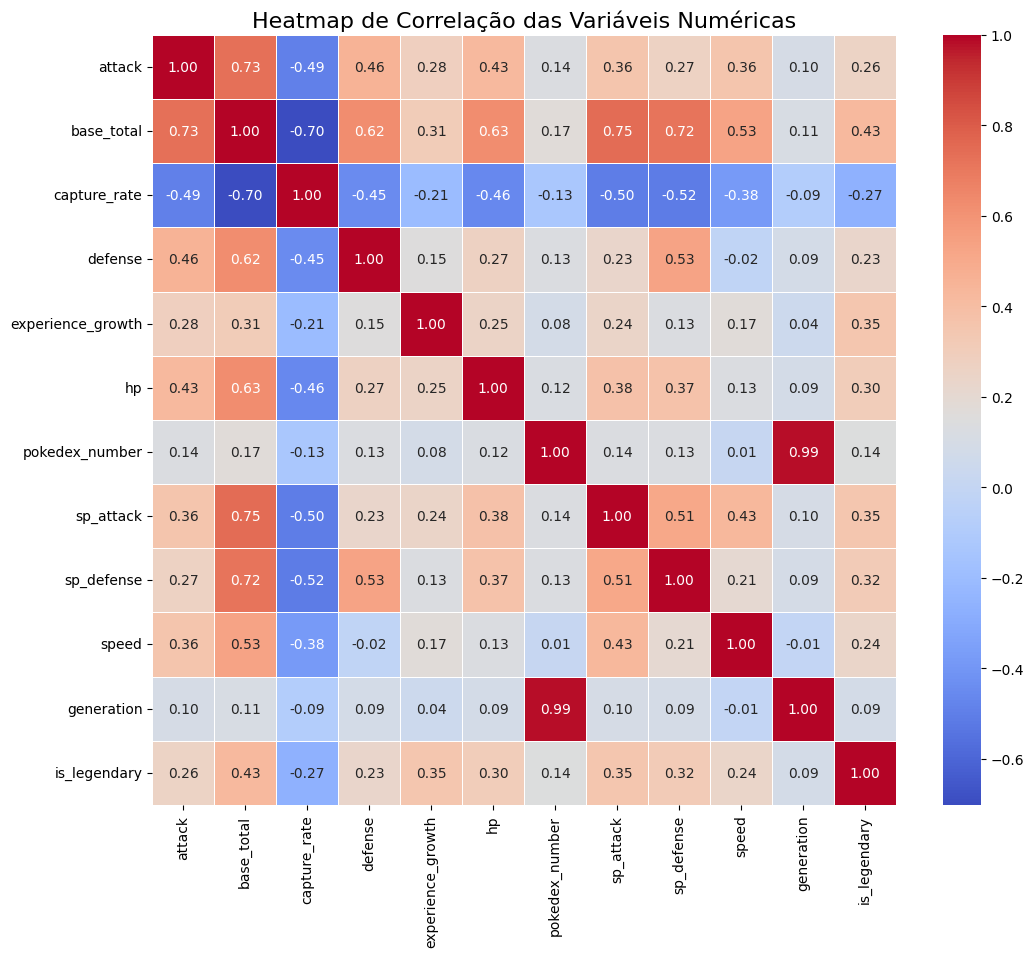

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/pokemon_finalizado.csv')

df_numeric = df.select_dtypes(include=['number'])

correlation_matrix = df_numeric.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
correlation_matrix,
annot=True,
cmap='coolwarm',
fmt='.2f',
linewidths=.5)
plt.title('Heatmap de Correlação das Variáveis Numéricas', fontsize=16)
plt.show()


Interpretação do gráfico:

Esse gráfico mostra o oposto do que foi visto no scatter plot da aula passada, aqui está mostrando que "base_total" tem uma correlação fraca e negativa com "capture_rate", enquanto o scatter plot mostrava o contrário.
Outro ponto a se observar, é que o "base_total" também não tem correlação com o "capture_rate", indo contra o que estávamos pensando.

Agora, se tratando de correlações fortes, o gráfico nos mostra que existe uma entre "generation" e "pokedex_number", o que não é nem um pouco surpreendente já que a cada geração os números incrementam de onde pararam na geração anterior.

Outras correlações esperadas são 'sp_attack', 'attack', 'sp_defense', 'hp', 'defense' e 'speed' contribuindo para 'base_total', embora seja interessante ver os pesos, significando que há mais pokémon com ataque especial alto do que velocidade. Além disso 'is_legendary' tem uma correlação relativamente alta com 'base_total', o que também faz sentido e é até meio estranho que não seja maior.

Além desse gráfico, nós experimentamos computar pokémon de cada geração individualmente mas os gráficos ficaram praticamente idênticos, variando muito pouco entre os números, mas mostrando que há sim algum tipo de balanceamento ou padronização intencional entre cada adição de criaturas.

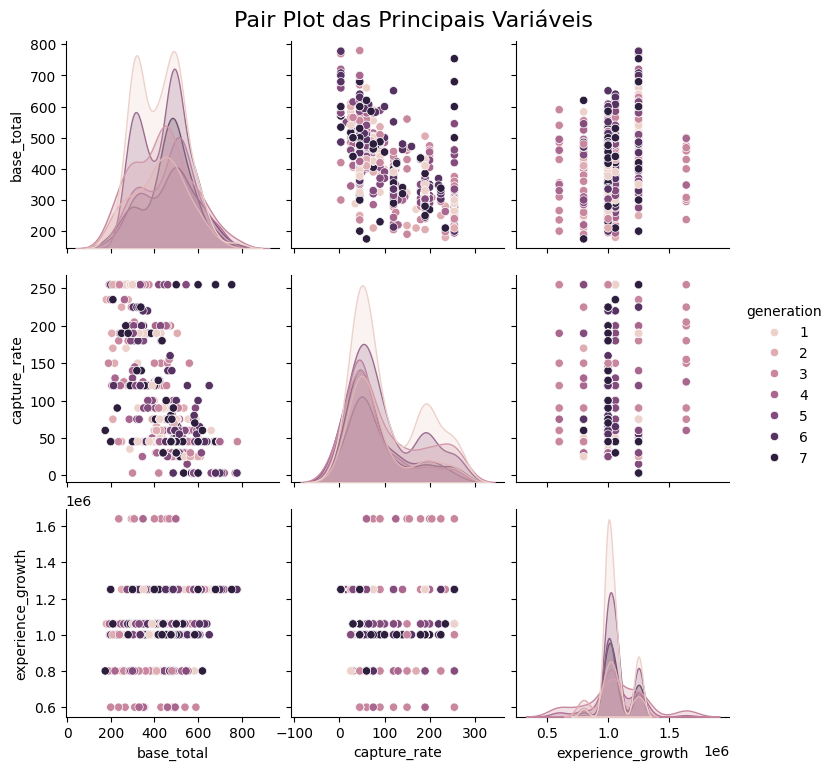

In [2]:
df = pd.read_csv('../data/pokemon_finalizado.csv')

colunas_para_pairplot = ['base_total', 'capture_rate', 'experience_growth', 'generation']
colunas_existentes = [col for col in colunas_para_pairplot if col in df.columns]
if len(colunas_existentes) > 1:
  sns.pairplot(df[colunas_existentes], hue='generation' if 'generation' in df.columns else None, diag_kind='kde')
  plt.suptitle('Pair Plot das Principais Variáveis', y=1.02, fontsize=16)
  plt.show()
else:
  print("Selecione pelo menos duas colunas existentes para o pair plot.")


Começando pelos gráficos de relação de variáveis não temos nada muito interessante já que duas dessas relações já haviam sido analizadas anteriormente:

'capture_rate'/'base_total' mostra que apesar de haver uma certa consistência no sentido de haver sempre pokémon mais fracos por todo o espectro de taxas de captura, a força máxima dos pokémon vão aumentando conforme as taxas de captura vão diminuindo, com a excessão da taxa de 100% de captura que já foi discutida na última análise;

'base_total'/'experience_growth' mostra a mesma relação, em que há pokémon fracos em todas as categorias, mas os mais fortes de grupo vão aumentando junto com a dificuldade de subir de nível, novamente apontando a disparidade do grupo mais embaixo e o grupo mais em cima, que também foram discutidos anteriormente;

'capture_rate'/'experience_growth' mostra apenas uma pequena correlação entre a dificuldade de capturar e de treinar, mas em geral é bem distribuído.


Agora os gráficos de distribuição de uma variável:
Em 'base_total' podemos ver dois picos entre a marca dos 300 e dos 500, que mais ou menos se mantém em cada geração, e pode-se conferir que os maiores valores se concentram na pequena geração;

Em 'capture_rate' podemos ver um grande pico na marca dos 50, o que mostra que a grande maioria dos pokémon não são tão fáceis de capturar, seguido de um vale na marca dos 150 que sobe novamente aos 200, mas pouco. Todas as gerações parecem ser consistentes nesse gráfico, com a excessão da primeira que apresenta uma grande disparidade.

E finalmente, em 'experience_growth' podemos conferir que a grande maioria ou está nos grupo "medium slow" (1.06) e "medium fast" (1.0), ou em "slow" (1.25), novamente com uma grande disparidade gerada pela primeira geração.


Em geral, nada surpreendente.